# Predicting IBM Employee Attrition Python Jupyter Notebook

## Part 1 - Feature Engineering and Selection

### A. Import Libraries and Data Set, and Inspect Data Set

** Import numpy and pandas. **

In [1]:
import numpy as np
import pandas as pd

** Import data visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Import IBM Employee Churn / Attrition comma-separated (CSV) file into a Pandas dataframe called churn. **

In [3]:
churn = pd.read_csv('../data/ibm_hr_emp_churn.csv', sep=',')

** Create copy of churn dataframe for exploratory data analysis and feature engineering. **

In [4]:
churn1 = churn.copy()

** View first five rows of churn dataframe. **

In [5]:
churn1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


** Obtain number of rows and columns in churn dataframe. **

In [6]:
churn1.shape

(1470, 35)

** View structure of churn dataframe. **

In [7]:
churn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

** Check for presence of missing values for all features. **

In [8]:
churn1.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### B. Explore and Engineer Categorical Features

** Gather summary statistics for categorical features. **

In [9]:
churn1.describe(include=['object'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


** Obtain value counts for Attrition variable. **

In [10]:
churn1.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

** Generate Churn dummy variable by mapping Attrition categories to 0 or 1. (0 = No, 1 = Yes) **

In [11]:
churn1['Churn'] = churn1.Attrition.map({'No':0, 'Yes':1})
churn1.Churn.value_counts()

0    1233
1     237
Name: Churn, dtype: int64

** Obtain value counts for BusinessTravel variable. **

In [12]:
churn1.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

** Convert BusinessTravel to numeric BusTravLevel (Business Travel Level) variable. (0 = Non-Travel, 1 = Travel_Rarely, 2 = Travel_Frequently) **

In [13]:
churn1['BusTravLevel'] = churn1.BusinessTravel.map({'Travel_Rarely':1, 'Travel_Frequently':2, 'Non-Travel':0})
churn1.BusTravLevel.value_counts()

1    1043
2     277
0     150
Name: BusTravLevel, dtype: int64

** Obtain value counts and employee churn probabilities for each Department. **

In [14]:
churn1.groupby('Department').Churn.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
Department,,
Sales,446,0.206278
Human Resources,63,0.190476
Research & Development,961,0.138398


** Create Department dummy variables and add it to churn dataframe. **

In [15]:
dept_dummies = pd.get_dummies(churn1.Department).drop('Research & Development', axis=1)
dept_dummies = dept_dummies.rename(columns={'Human Resources':'HR_Dept', 'Sales':'Sales_Dept'})
churn2 = pd.concat([churn1, dept_dummies], axis=1)
churn2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Churn,BusTravLevel,HR_Dept,Sales_Dept
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,1,6,4,0,5,1,1,0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,3,3,10,7,1,7,0,2,0,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,3,3,0,0,0,0,1,1,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,3,8,7,3,0,0,2,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,3,3,2,2,2,2,0,1,0,0


** Obtain value counts and employee churn probabilities for each Education Field. **

In [16]:
churn2.groupby('EducationField').Churn.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
EducationField,,
Human Resources,27,0.259259
Technical Degree,132,0.242424
Marketing,159,0.220126
Life Sciences,606,0.146865
Medical,464,0.135776
Other,82,0.134146


** Create Education Field dummy variables and add it to churn dataframe. **

In [17]:
edu_dummies = pd.get_dummies(churn2.EducationField).drop('Life Sciences', axis=1)
edu_dummies = edu_dummies.rename(columns={'Human Resources':'HR_Major', 'Technical Degree':'Tech_Major', 'Marketing':
                                          'Market_Major', 'Medical':'Med_Major', 'Other':'Other_Major'})
churn3 = pd.concat([churn2, edu_dummies], axis=1)
churn3.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsWithCurrManager,Churn,BusTravLevel,HR_Dept,Sales_Dept,HR_Major,Market_Major,Med_Major,Other_Major,Tech_Major
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,5,1,1,0,1,0,0,0,0,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,7,0,2,0,0,0,0,0,0,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,1,1,0,0,0,0,0,1,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,0,2,0,0,0,0,0,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,2,0,1,0,0,0,0,1,0,0


** Obtain value counts for Gender variable. **

In [18]:
churn3.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

** Generate Gender_Dum dummy variable by mapping Gender categories to 0 or 1. (0 = Male, 1 = Female) **

In [19]:
churn3['Gender_Dum'] = churn3.Gender.map({'Male':0, 'Female':1})
churn3.Gender_Dum.value_counts()

0    882
1    588
Name: Gender_Dum, dtype: int64

** Obtain value counts and employee churn probabilities for each Job Role. **

In [20]:
churn3.groupby('JobRole').Churn.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
JobRole,,
Sales Representative,83,0.397590
Laboratory Technician,259,0.239382
Human Resources,52,0.230769
Sales Executive,326,0.174847
Research Scientist,292,0.160959
Manufacturing Director,145,0.068966
Healthcare Representative,131,0.068702
Manager,102,0.049020
Research Director,80,0.025000


** Create Job Role dummy variables and add it to churn dataframe. **

In [21]:
job_dummies = pd.get_dummies(churn3.JobRole).drop('Sales Executive', axis=1)
job_dummies = job_dummies.rename(columns={'Sales Representative':'Sales_Rep', 'Laboratory Technician':'Lab_Tech', 
                                          'Human Resources':'HR', 'Research Scientist':'Research_Sci', 
                                          'Manufacturing Director':'Manuf_Dir', 'Healthcare Representative':'HC_Rep', 
                                          'Manager':'Mgr', 'Research Director':'Research_Dir'})
churn4 = pd.concat([churn3, job_dummies], axis=1)
churn4.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,Tech_Major,Gender_Dum,HC_Rep,HR,Lab_Tech,Mgr,Manuf_Dir,Research_Dir,Research_Sci,Sales_Rep
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,1,0,0,0,0,0,0,0,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,0,0,0,0,0,0,0,0,1,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,0,0,0,1,0,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,1,0,0,0,0,0,0,1,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,0,0,0,0,1,0,0,0,0,0


** Obtain value counts and employee churn probabilities for each Marital Status. **

In [22]:
churn4.groupby('MaritalStatus').Churn.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
MaritalStatus,,
Single,470,0.255319
Married,673,0.124814
Divorced,327,0.100917


** Create Marital Status dummy variables and add it to churn dataframe. **

In [23]:
marital_dummies = pd.get_dummies(churn4.MaritalStatus).drop('Married', axis=1)
churn5 = pd.concat([churn4, marital_dummies], axis=1)
churn5.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,HC_Rep,HR,Lab_Tech,Mgr,Manuf_Dir,Research_Dir,Research_Sci,Sales_Rep,Divorced,Single
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,0,0,0,0,0,0,0,0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,0,0,0,0,0,0,1,0,0,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,0,1,0,0,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,0,0,0,0,0,1,0,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,0,0,1,0,0,0,0,0,0,0


** Obtain value counts for Over18 variable. **

In [24]:
churn5.Over18.value_counts()

Y    1470
Name: Over18, dtype: int64

** Obtain value counts for OverTime variable. **

In [25]:
churn5.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

** Generate Overtime_Dum dummy variable by mapping OverTime categories to 0 or 1. (0 = No, 1 = Yes) **

In [26]:
churn5['Overtime_Dum'] = churn5.OverTime.map({'No':0, 'Yes':1})
churn5.Overtime_Dum.value_counts()

0    1054
1     416
Name: Overtime_Dum, dtype: int64

** Drop unengineered or unnecessary categorical features from churn dataframe. **

In [27]:
churn_eng_cat = churn5.drop(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 
                            'Over18', 'OverTime'], axis=1)

** Obtain number of rows and columns in churn dataframe with engineered categorical features and unengineered numerical features. **

In [28]:
churn_eng_cat.shape

(1470, 47)

** View structure of churn dataframe with engineered categorical features and unengineered numerical features. **

In [29]:
churn_eng_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 47 columns):
Age                         1470 non-null int64
DailyRate                   1470 non-null int64
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobSatisfaction             1470 non-null int64
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1470 non-null int64
PercentSalaryHike           1470 non-null int64
PerformanceRating           1470 non-null int64
RelationshipSatisfaction    1470 non-null int64
StandardHours               1470 non-null int64
StockOptionLevel            1

### C. Explore and Engineer Numerical Features

** Drop unnecessary numerical features from churn dataframe. **

In [30]:
churn6 = churn_eng_cat.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours'], axis=1)

** Remap ordered numerical features so that lowest level is 0 instead of 1. **

In [31]:
churn6['Education'] = churn6.Education.map({1:0, 2:1, 3:2, 4:3, 5:4})
churn6['EnvironmentSatisfaction'] = churn6.EnvironmentSatisfaction.map({1:0, 2:1, 3:2, 4:3})
churn6['JobInvolvement'] = churn6.JobInvolvement.map({1:0, 2:1, 3:2, 4:3})
churn6['JobLevel'] = churn6.JobLevel.map({1:0, 2:1, 3:2, 4:3, 5:4})
churn6['JobSatisfaction'] = churn6.JobSatisfaction.map({1:0, 2:1, 3:2, 4:3})
churn6['PerformanceRating'] = churn6.PerformanceRating.map({1:0, 2:1, 3:2, 4:3})
churn6['RelationshipSatisfaction'] = churn6.RelationshipSatisfaction.map({1:0, 2:1, 3:2, 4:3})
churn6['WorkLifeBalance'] = churn6.WorkLifeBalance.map({1:0, 2:1, 3:2, 4:3})

** Extract numerical features from churn dataframe to see correlation matrix between features. **

In [32]:
num_features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 
               'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 
                'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 
               'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
churn_num_feat = churn6[num_features]

** Check the number of numerical features. **

In [33]:
churn_num_feat.shape

(1470, 23)

** View correlation matrix for numerical features. **

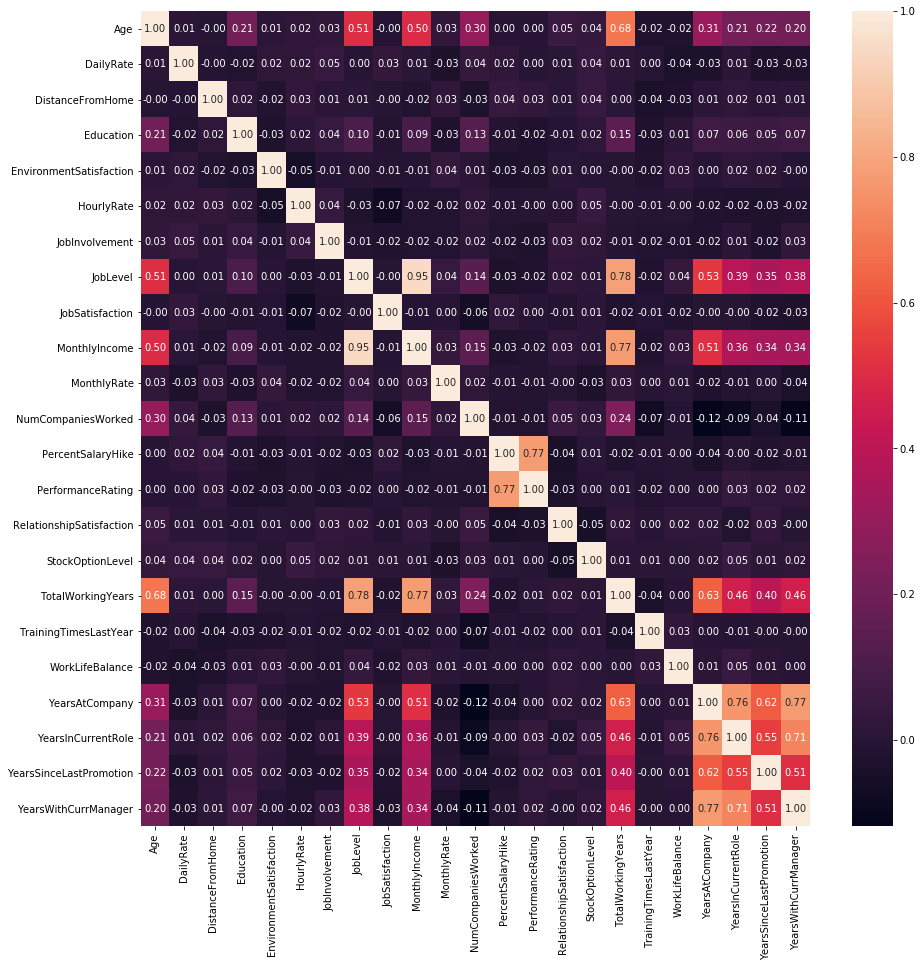

In [34]:
plt.figure(figsize=(15, 15))
sns.heatmap(churn_num_feat.corr(), annot=True, fmt=".2f")

### D. Feature Selection

** Define X and y for feature selection. **

In [35]:
X = churn6.drop(['Churn'], axis=1)
y = churn6['Churn']

** Select features by assessing their importance using embedded random forest method. **

In [36]:
# Feature Selection: Embedded Method
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

feature_imp = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['importance'])
feat_imp_13 = feature_imp.sort_values('importance', ascending=False).head(13).index
feat_imp_13

C:\Users\kyrma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Index(['MonthlyIncome', 'DailyRate', 'TotalWorkingYears', 'Overtime_Dum',
       'HourlyRate', 'Age', 'DistanceFromHome', 'MonthlyRate',
       'WorkLifeBalance', 'NumCompaniesWorked', 'YearsAtCompany',
       'PercentSalaryHike', 'EnvironmentSatisfaction'],
      dtype='object')

** Select features with filter method that removes all low-variance features. **

In [37]:
# Feature Selection: Filter Method
from sklearn.feature_selection import VarianceThreshold, f_regression, SelectKBest

# Find all features with more than 90% variance in values.
threshold = 0.90
vt = VarianceThreshold().fit(X)

# Find feature names.
feat_var_threshold = X.columns[vt.variances_ > threshold * (1-threshold)]

# Select the top 13.
feat_var_threshold[0:13]

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike'],
      dtype='object')

** Filter for features selected by embedded random forest method but were not selected by filter method. **

In [38]:
set(feat_var_threshold[0:13]) - set(feat_imp_13)

{'Education', 'JobInvolvement', 'JobLevel', 'JobSatisfaction'}

** Filter for features selected by filter method that removes all low-variance features but were not selected by embedded random forest method. **

In [39]:
set(feat_imp_13) - set(feat_var_threshold)

set()

** Select features based on univariate statistical tests. **

In [40]:
# Feature Selection: Filter Method
X_scored = SelectKBest(score_func=f_regression, k='all').fit(X, y)
feature_scoring = pd.DataFrame({'feature': X.columns, 'score': X_scored.scores_})

feat_scored_13 = feature_scoring.sort_values('score', ascending=False).head(13)['feature'].values
feat_scored_13

array(['Overtime_Dum', 'Single', 'TotalWorkingYears', 'JobLevel',
       'YearsInCurrentRole', 'MonthlyIncome', 'Age', 'Sales_Rep',
       'YearsWithCurrManager', 'StockOptionLevel', 'YearsAtCompany',
       'JobInvolvement', 'BusTravLevel'], dtype=object)

** Select features by eliminating them recursively via wrapper method. **

In [41]:
# Feature Selection: Wrapper Method
from sklearn.linear_model import LogisticRegression

# Select 13 features by using recursive feature elimination (RFE) with logistic regression model.
from sklearn.feature_selection import RFE
rfe = RFE(LogisticRegression(), 13)
rfe.fit(X, y)

feature_rfe_scoring = pd.DataFrame({'feature': X.columns, 'score': rfe.ranking_})

feat_rfe_13 = feature_rfe_scoring[feature_rfe_scoring['score'] == 1]['feature'].values
feat_rfe_13

array(['EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'BusTravLevel', 'Sales_Dept', 'HR_Major', 'Tech_Major', 'HR',
       'Lab_Tech', 'Research_Dir', 'Sales_Rep', 'Single', 'Overtime_Dum'],
      dtype=object)

** Gather unique features from all four feature selection methods. **

In [42]:
features = np.hstack([feat_var_threshold[0:13], feat_imp_13, feat_scored_13, feat_rfe_13])

features = np.unique(features)
print('Final features set:\n')
for f in features:
    print("\t-{}".format(f))

Final features set:

	-Age
	-BusTravLevel
	-DailyRate
	-DistanceFromHome
	-Education
	-EnvironmentSatisfaction
	-HR
	-HR_Major
	-HourlyRate
	-JobInvolvement
	-JobLevel
	-JobSatisfaction
	-Lab_Tech
	-MonthlyIncome
	-MonthlyRate
	-NumCompaniesWorked
	-Overtime_Dum
	-PercentSalaryHike
	-Research_Dir
	-Sales_Dept
	-Sales_Rep
	-Single
	-StockOptionLevel
	-Tech_Major
	-TotalWorkingYears
	-WorkLifeBalance
	-YearsAtCompany
	-YearsInCurrentRole
	-YearsWithCurrManager


** Select features using tree-based estimators. **

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusTravLevel',
       'HR_Dept', 'Sales_Dept', 'HR_Major', 'Market_Major', 'Med_Major',
       'Other_Major', 'Tech_Major', 'Gender_Dum', 'HC_Rep', 'HR', 'Lab_Tech',
       'Mgr', 'Manuf_Dir', 'Research_Dir', 'Research_Sci', 'Sales_Rep',
       'Divorced', 'Single', 'Overtime_Dum'],
      dtype='object')

* Based off the above unique and selected features from all four feature selection methods plus tree-based estimators, numerical feature correlation matrix heatmap, and business logic / domain knowledge, I have decided to include only these features to build the machine learning models: Age, DistanceFromHome, EnvironmentSatisfaction, JobInvolvement, MonthlyIncome, StockOptionLevel, Sales_Rep, Single, BusTravLevel, and Overtime_Dum. 

** Create churn / attrition modeling data by selecting target feature and predictor features for modeling. **

In [44]:
modeling_cols = ['Churn', 'Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 'MonthlyIncome', 
                 'StockOptionLevel', 'Sales_Rep', 'Single', 'BusTravLevel', 'Overtime_Dum']
churn_model = churn6[modeling_cols]

** Obtain value counts and employee churn probabilities for Overtime_Dum (Overtime dummy) variable, a categorical feature that highly impacts likelihood of employee to churn. **

In [45]:
churn_model.groupby('Overtime_Dum').Churn.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
Overtime_Dum,,
1,416,0.305288
0,1054,0.104364


** Generate histogram for Monthly Income, a numerical feature that highly impacts likelihood of employee to churn. **

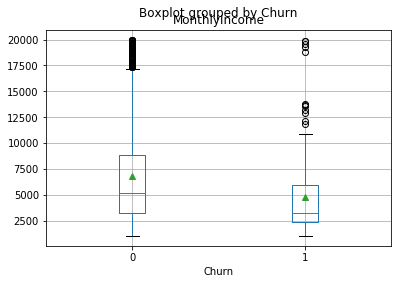

In [46]:
churn_model.boxplot(column='MonthlyIncome', by='Churn', showmeans=True)

** Export finalized churn modeling dataframe to CSV file. **

In [47]:
churn_model.to_csv('../data/churn_modeling_data.csv', sep=',', index=False)

** Save finalized churn modeling dataframe to pickle file for subsequent classification model notebooks. **

In [48]:
churn_model.to_pickle('../data/churn_modeling_data.pickle')